In [1]:
import pandas as pd

In [2]:
fruits = pd.read_csv('../data/fruits.csv')

In [3]:
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [4]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [5]:
fruits.describe()

,length,weight
count,49.000000,49.000000
mean,27.055102,444.500000
std,10.242804,328.143233
min,9.800000,6.700000
25%,14.300000,19.700000
50%,31.000000,500.000000
75%,34.500000,700.000000
max,41.000000,1000.000000


In [8]:
fruits.name.value_counts()

apple    35
berry    14
Name: name, dtype: int64

> fruits에 35개의 apple과 14개의 berry 데이터가 있다.

In [11]:
# 사과정보 불러오기

apple = fruits[fruits.name=='apple']
# apple = fruits[0:35] # 데이터를 알 경우엔 이런 방식이 쉽다
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


In [12]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### apple 산포도 그리기

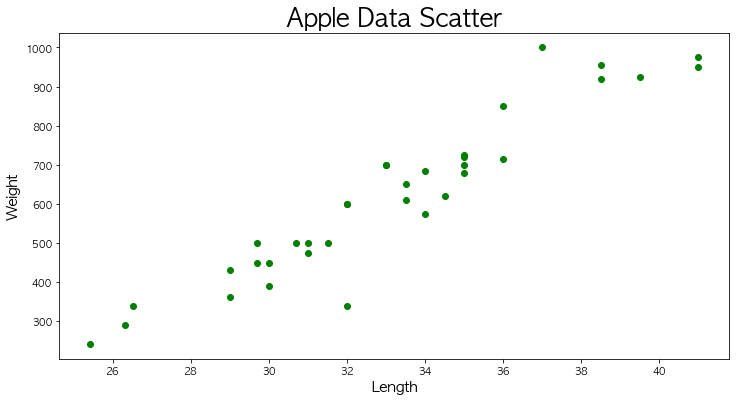

In [38]:
# apple.plot(
#     kind='scatter',
#     x='length',
#     y='weight',
# )
plt.figure(figsize=(12,6))
plt.scatter(
    apple.length,
    apple.weight,
    c='green'
)

plt.title('Apple Data Scatter', size=25)
plt.xlabel('Length', size=15)
plt.ylabel('Weight', size=15)

plt.show()

In [30]:
# berry data 불러오기

berry = fruits[fruits.name=='berry']
berry.tail()

,length,weight,name
44,12.2,12.2,berry
45,12.4,13.4,berry
46,13.0,12.2,berry
47,14.3,19.7,berry
48,15.0,19.9,berry


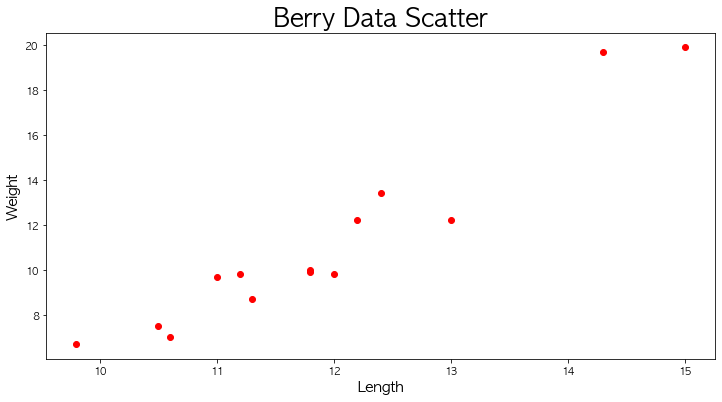

In [37]:
# berry 산포도 그리기

plt.figure(figsize=(12,6))
plt.scatter(
    berry.length,
    berry.weight,
    c='red'
)

plt.title('Berry Data Scatter', size=25)
plt.xlabel('Length', size=15)
plt.ylabel('Weight', size=15)

plt.show()

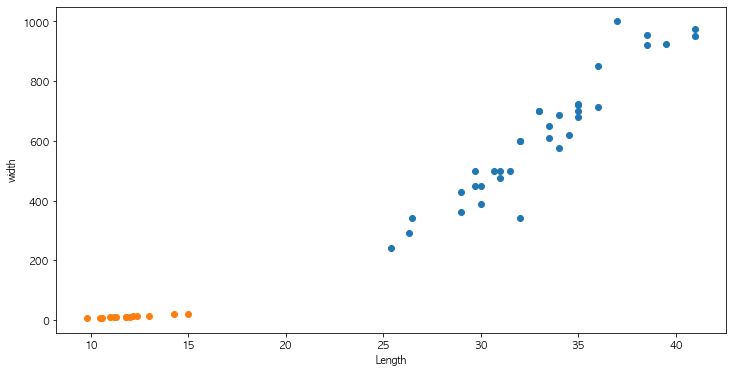

In [40]:
# 2개의 dataset을 산포도로 한번에 비교하기
plt.figure(figsize=(12,6))
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)

plt.xlabel('Length')
plt.ylabel('width')

plt.show()

> 이런 데이터는 회귀식 쓸 필요 없다 : 분류가 잘 되어있어서

---
# 머신러닝을 위한 데이터 준비
### Feature, Target Data의 분리

In [55]:
# Feature Data
fruitsData = fruits[['length', 'weight']]
# fruits.loc[:,'length':'weight']
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [56]:
# Target Data
fruitsTarget = fruits['name']
fruitsTarget.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

---
### 최근접 이웃(KNN : K Nearest Neighbors) 분류 알고리즘 사용
: 최근접 이웃 분류 알고리즘은 지도학습이다.   
> 주로 k 값은 홀수로 사용

![](../Data/KNN_%EC%84%A4%EB%AA%85.png)

In [57]:
from sklearn.neighbors import KNeighborsClassifier # 분류

In [58]:
kn = KNeighborsClassifier() # n_neighbors = 5가 default, 보통은 홀수로 입력 : Hyper Parameter

In [59]:
# 학습시키기
kn.fit(fruitsData, fruitsTarget)

KNeighborsClassifier()

In [61]:
# 정확도 확인
kn.score(fruitsData, fruitsTarget)

1.0

> 문제와 답을 알려주고 정확도를 확인하기

### 예측해보기
- 길이가 30 cm 이고 무게가 600 g인 과일은 무엇일까요?

In [82]:
x = [30, 600]

kn.predict([x])

array(['apple'], dtype=object)

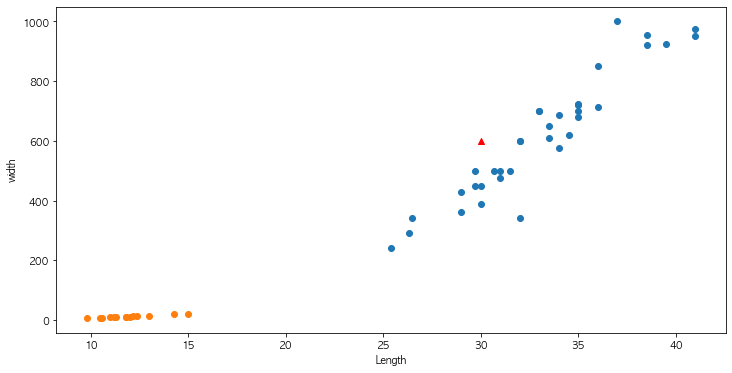

In [87]:
# 산포도로 예측 범위 확인하기
plt.figure(figsize=(12,6))

plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)
plt.scatter(30, 600, marker='^', c='red')

plt.xlabel('Length')
plt.ylabel('width')

plt.show()

> apple 잘 맞춤   
> 데이터가 응집, 군집이 잘 되어있으면 knn이 편하다